/home/vfornemo/project/PytChem



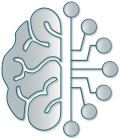

**Start at:** Sunday 10 December 2023, 21:06:30  
**Hostname:** vfornemo-server (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)

import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "Thierry Leininger, LCPQ (CNRS-UT3 lab, Toulouse, France)"

 # Harmonic Oscillator

## Introduction

<div class="intro">

In this project, we propose to solve the Schrödinger equation for the one-dimensional quantum harmonic oscillator and vizualise the corresponding solutions and some of their properties. As usual, the Schrödinger equation reads:

$$\hat{H}(x)\psi_v(x)=E_v\psi_v(x)$$

with $\hat{H}=\hat{T}+\hat{V}$

The kinetic energy is given by $ \hat{T}= \frac{\hat{p}^2}{2m} $ which, with $\hat{p}=- i\hbar \frac{\partial}{\partial \hat{x}}$, becomes


$$ \hat{T}=-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}$$

In the case of the harmonic oscillator the potential energy of the particle is simply 
$$\hat{V} = \frac{1}{2}kx^2$$


Thus, the Schrodinger equation one has to solve is 
    
$$[-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}+\frac{1}{2}kx^2]\psi_v(x) = E_v\psi_v(x)$$

</div>

<div class="exE">

- From now on, we will choose $\hbar=m=k=1$. Plot the corresponding harmonic potential.
</div>

Text(0.5, 1.0, 'Harmonic Potential')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$V$')

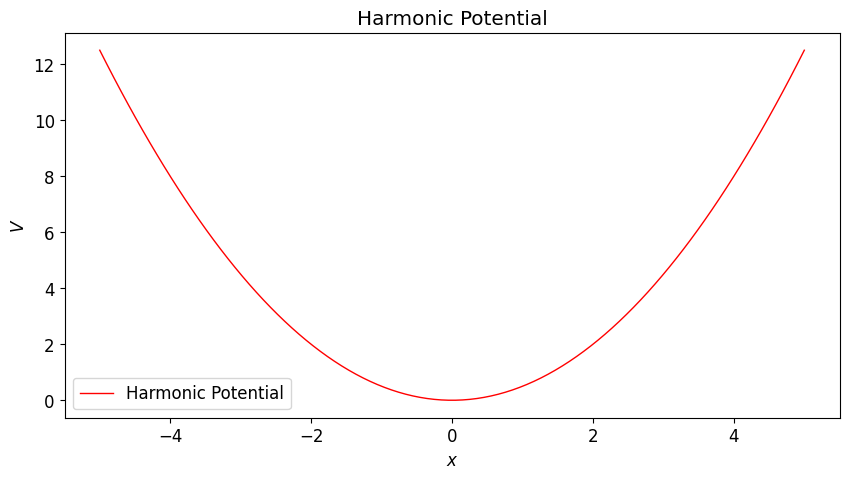

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Definition of the potential energy function
def har_V(x):
    V = 0.5*x**2
    return V

# Generate linspace
_x = np.linspace(-5.,5.,100)
_V = har_V(_x)

# Plotting
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_x, _V, linewidth=1,color='red',label="Harmonic Potential")
plt.title("Harmonic Potential")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$V$")
plt.show()



### Solutions of the Schrödinger Equation

<div class="intro">

As suggested above, the solutions of the Quantum Harmonic Oscillator depend on a (<i>vibrational</i>) quantum number $v$.

The energies ($ie$ eigenvalues) are given by

$$ E_v=(v+\frac{1}{2})\hbar\omega$$ with $v=0, 1, 2, ...$ and $\omega=\sqrt{(\frac{k}{m})}$


The corresponding wavefunctions ($ie$ eigenfunctions) are given by

$$\Psi_v=N_vH_ve^{-y^2/2}$$ where $N_v$ is the normalization factor, $H_v$ the <b>Hermite polynomial</b> and $y=(\frac{mk}{\hbar^2})^{1/4}x$.


The <b>Hermite polynomials</b> are defined using a recurrence relation
$$H_{v+1}=2yH_v-2vH_{v-1}$$
with $H_0=1$ and $H_1=2y$.


<div class="exE">

Code a `Hv(v,y)` function returning the evaluation of $v^{th}$ Hermite polynomial, $H_v$ at a given value $y$
</div>

In [3]:
import sympy as sym
from IPython.display import Latex

# Definition of the Hermite polynomials
def Hv(v, y):
    
    # Check if v is a natural integer
    if v < 0 or type(v) != int:
        raise RuntimeError("Error: v must be a positive integer or zero.")

    H0 = 1
    H1 = 2*y

    if v == 0:
        return H0
    elif v == 1:
        return H1
    else:
        for n in range(2, v+1, 1):
            Hn = 2*y*H1 - 2*(n-1)*H0
            H0 = H1
            H1 = Hn
        return H1 # We should return Hn, here Hn = H1. Returning Hn will result in an reference error.


# test
y = sym.symbols('y')
for i in range(5):
    #print latex
    func = sym.simplify(Hv(i, y))
    Latex(f"$H_{i} = {sym.latex(func)}$")


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="exE">

Using the `hermite` function from `sympy`, print the first 6 Hermite polynomials and check your code written in the previous cell for a few values of <i>v</i> and <i>y</i>.
The results will be advantageoulsy presented in a table (see example below) beside the expression of the `hermite`polynomial.

<p style="text-align:center;"><img width="280" src = "./tableQHO.jpg"/></p>

</div>

In [4]:
from sympy import hermite_poly

# generate y data
y = sym.symbols('y')
yl = np.linspace(0, 5, 5)

# compare the results
for i in range(6):
    print("v = {0}, H_v = {1}".format(i, hermite_poly(i, y)))
    print("  y        Hermite(y)       Hv(y)")
    for j in range(len(yl)):
        sym_val = hermite_poly(i, yl[j]).evalf()
        hv_val = Hv(i, yl[j])
        print("{0:5.2f} {1:14.6f} {2:14.6f}".format(yl[j], sym_val, hv_val))
    print()
    


v = 0, H_v = 1
  y        Hermite(y)       Hv(y)
 0.00       1.000000       1.000000
 1.25       1.000000       1.000000
 2.50       1.000000       1.000000
 3.75       1.000000       1.000000
 5.00       1.000000       1.000000

v = 1, H_v = 2*y
  y        Hermite(y)       Hv(y)
 0.00       0.000000       0.000000
 1.25       2.500000       2.500000
 2.50       5.000000       5.000000
 3.75       7.500000       7.500000
 5.00      10.000000      10.000000

v = 2, H_v = 4*y**2 - 2
  y        Hermite(y)       Hv(y)
 0.00      -2.000000      -2.000000
 1.25       4.250000       4.250000
 2.50      23.000000      23.000000
 3.75      54.250000      54.250000
 5.00      98.000000      98.000000

v = 3, H_v = 8*y**3 - 12*y
  y        Hermite(y)       Hv(y)
 0.00       0.000000      -0.000000
 1.25       0.625000       0.625000
 2.50      95.000000      95.000000
 3.75     376.875000     376.875000
 5.00     940.000000     940.000000

v = 4, H_v = 16*y**4 - 48*y**2 + 12
  y        Hermite(y)

<div class="exE">

Use the previous expression of the Hermite polynomials to verify with `sympy` that the normalization factor $N_v$ 
are given by $N=(\pi ^{1/2} 2^v v!)^{-1/2}$.</div>

In [5]:
from sympy import oo

# Perform normalization to get the normalization coefficient
def norm_coeff(f):
    """
    Normalization
    
    input:
        - f: a function of v and y
    returns:
        normalization coefficient
    """
    f_int = sym.integrate(f*sym.conjugate(f), (y,-oo,+oo))
    f_int = 1/sym.sqrt(f_int)

    return f_int

# Generate normalization factor of a given v
def norm_factor(v):
    """
    Normalization factor
    
    input:
        - v: quantum number
    returns:
        normalization factor
    """
    N = 1/sym.sqrt(sym.factorial(v)*2**v*sym.sqrt(sym.pi))
    return N

for v in range(10):
    f = hermite_poly(v, y)*sym.exp(-y**2/2)
    N1 = norm_coeff(f).evalf()
    N2 = norm_factor(v).evalf()
    delta = N1 - N2
    print("v = {0}, N1 = {1}, N2 = {2}, N1 - N2 = {3}".format(v, N1, N2, delta))
print("N1 is the normalization factor calculated by integral, N2 is the normalization factor calculated by the given expression.")
print("Normalization factor is verified.")




v = 0, N1 = 0.751125544464943, N2 = 0.751125544464943, N1 - N2 = 0
v = 1, N1 = 0.531125966013599, N2 = 0.531125966013599, N1 - N2 = 0
v = 2, N1 = 0.265562983006799, N2 = 0.265562983006799, N1 - N2 = 0
v = 3, N1 = 0.108415633823010, N2 = 0.108415633823010, N1 - N2 = 0
v = 4, N1 = 0.0383307149314439, N2 = 0.0383307149314439, N1 - N2 = 0
v = 5, N1 = 0.0121212363525988, N2 = 0.0121212363525988, N1 - N2 = 0
v = 6, N1 = 0.00349909953554198, N2 = 0.00349909953554198, N1 - N2 = 0
v = 7, N1 = 0.000935173687444138, N2 = 0.000935173687444138, N1 - N2 = 0
v = 8, N1 = 0.000233793421861034, N2 = 0.000233793421861034, N1 - N2 = 0
v = 9, N1 = 0.0000551056379982482, N2 = 0.0000551056379982482, N1 - N2 = 0
N1 is the normalization factor calculated by integral, N2 is the normalization factor calculated by the given expression.
Normalization factor is verified.


## Wavefunctions

<div class="rqT" title="Directives">
    
From now on, you have to do symbolic algebra with the SymPy library.
</div>

<div class="exE">
Compute the left-hand side of Schrödinger equation to verify that $\Psi_v(x)$ and $E_v$ are eigenfunctions and eigenvalues.

In [21]:
# Construct nabla2(f)
# We reconsider k, m and hbar as 1


# Define H(f)
def H(f):
    """
    Hamiltonian
    
    input:
        - f: a function of y, y = (mk/hbar^2)^1/4*x
    returns:
        the hamiltonian of f
    """
    sym.simplify(f)
    
    # Calculate nabla2(f)
    x = sym.symbols('x')
    # m,k,hbar = sym.symbols('m k hbar')
    # Now consider k, m and hbar as zeros to simplify the calculation
    m = 1
    k = 1
    hbar = 1
    f = f.subs(y, (m*k/hbar**2)**(1/4)*x)

    x_der1 = sym.diff(f,x)
    x_der2 = sym.diff(x_der1,x)

    Hf = -hbar**2/(2*m)*x_der2 + 0.5*k*x**2*f
    sym.simplify(Hf)
    return Hf

def phi_v(v):
    """
    Wave function
    
    input:
        - v: quantum number
    returns:
        vth order of wave function of harmonic oscillator (as a function of x)
    """
    f = norm_factor(v)*hermite_poly(v, y)*sym.exp(-y**2/2)
    f = f.subs(y, (m*k/hbar**2)**(1/4)*x)

    return f

x = sym.symbols('x')
# m,k,hbar = sym.symbols('m k hbar')
m = 1
k = 1
hbar = 1

def E_v(v):
    """
    Energy
    
    input:
        - v: quantum number
    returns:
        vth order of energy of harmonic oscillator
    """
    E = (0.5+v)
    return E


# After several trials, it is found that substraction of two expressions will not give zeros,
# even though simplify() and evalf() are used, which may be caused by bugs of sympy. 
# Therefore, we use the following method to verify
for v in range(6):
    f = phi_v(v)
    Hphi = H(f).simplify().expand()
    Ephi = E_v(v)*phi_v(v).simplify().expand()
    delta = Hphi - Ephi
    Latex(f"$H\psi_{v} - E_{v}\psi_{v} = {sym.latex(delta)}$")
Latex(r"The difference is zero or very close to zero, so $\Psi_v$ is the eigenfunction of $\hat{H}$, and $E_v$ is the eigenvalue of $\hat{H}$.")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Lowest wavefunctions and their associated energy

<div class="exE">
    
Complete the previous plot by plotting the $\Psi_v(x)$ at level $E_v$.

Text(5.3, 1.0, '$E_0 = 0.5$')

Text(-6, 1.0, '$v = 0$')

Text(5.3, 3.0, '$E_1 = 1.5$')

Text(-6, 3.0, '$v = 1$')

Text(5.3, 5.0, '$E_2 = 2.5$')

Text(-6, 5.0, '$v = 2$')

Text(5.3, 7.0, '$E_3 = 3.5$')

Text(-6, 7.0, '$v = 3$')

Text(5.3, 9.0, '$E_4 = 4.5$')

Text(-6, 9.0, '$v = 4$')

Text(5.3, 11.0, '$E_5 = 5.5$')

Text(-6, 11.0, '$v = 5$')

Text(0.5, 0, '$x$')

[]

Text(0.5, 1.0, 'Harmonic Wavefunctions at Different Energy Levels')

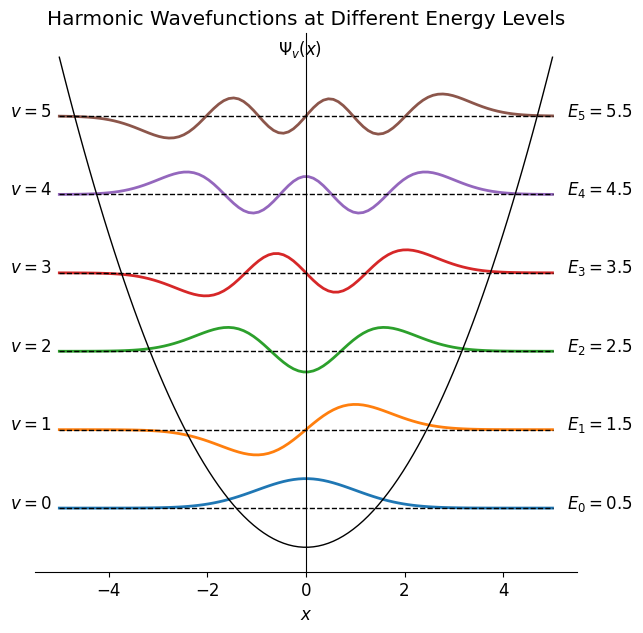

In [7]:
# Plots

fig, ax = plt.subplots(figsize=(7,7))

for v in range(6):
    # Generate linspace
    f = phi_v(v)
    _x = np.linspace(-5.,5.,100)
    _f = sym.lambdify(x, f)
    E = E_v(v)
    
    # Plotting
    ax.plot(_x, _f(_x)+2*E, linewidth=2,label="v = {0}".format(v)) # +2*E is used to separate the wave functions
    ax.plot(_x, np.zeros(len(_x))+2*E, linewidth=1,color='black', linestyle='--') # plot the baseline
    ax.annotate(f"$E_{v} = {E}$", xy=(5, 2*E), xytext=(5.3, 2*E)) # annotate the energy level
    ax.annotate(f"$v = {v}$", xy=(-5, 2*E), xytext=(-6, 2*E)) # annotate the quantum number
 

ax.plot(_x, _V, linewidth=1,color='black') # plot the potential energy curve
# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('center') # set the left spine to the center
ax.set_xlabel("$x$")
ax.set_ylabel("$\Psi_v(x)$", rotation=0).set_position((1,0.95))
ax.set_yticks([])
ax.set_title("Harmonic Wavefunctions at Different Energy Levels")
plt.show()

### Expectations values

<div class="intro">

The expectation value of an observable $\Omega$ is given by
$$<\Omega >=\int_{-\infty}^{+\infty}{\Psi^*_v \Omega \Psi_v dx}$$   

<div class="exE">    
Show that, with the values chosen for the constants, $<x^2>=v+\frac{1}{2}$.

In [22]:
def expc_val(f, A):
    """
    Expectation value of an observable
    
    input:
        - f: a wavefunction of x, x belongs to (-oo, +oo)
        - A: an observable
    returns:
        expectation value of A
    """
    expc = sym.integrate(f*A*f, (x,-oo,+oo))
    expc = sym.simplify(expc)
    return expc

x = sym.symbols('x')
for v in range(6):
    E1 = expc_val(phi_v(v), x**2)
    E2 = v + 0.5
    delta = E1 - E2
    print("v = {0}, E1 = {1}, E2 = {2}, E1 - E2 = {3}".format(v, E1, E2, delta))
Latex(f"E1 is the expectation value of $x^2$, E2 is calculated by the given expression.")
Latex(r"$<x^2>$ = $v + \frac{1}{2}$ is verified.")


v = 0, E1 = 0.500000000000000, E2 = 0.5, E1 - E2 = 0
v = 1, E1 = 1.50000000000000, E2 = 1.5, E1 - E2 = 0
v = 2, E1 = 2.50000000000000, E2 = 2.5, E1 - E2 = 0
v = 3, E1 = 3.50000000000000, E2 = 3.5, E1 - E2 = 0
v = 4, E1 = 4.50000000000000, E2 = 4.5, E1 - E2 = 0
v = 5, E1 = 5.50000000000000, E2 = 5.5, E1 - E2 = 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="exE">
Search the nodes of the wavefunctions (<i>ie</i> solve $H_v(y)=0$) for different values of $v$ and make a plot of these nodes.

</div>

Text(5.3, 1.0, '$E_0 = 0.5$')

Text(-6, 1.0, '$v = 0$')

Text(5.3, 3.0, '$E_1 = 1.5$')

Text(-6, 3.0, '$v = 1$')

Text(5.3, 5.0, '$E_2 = 2.5$')

Text(-6, 5.0, '$v = 2$')

Text(5.3, 7.0, '$E_3 = 3.5$')

Text(-6, 7.0, '$v = 3$')

Text(5.3, 9.0, '$E_4 = 4.5$')

Text(-6, 9.0, '$v = 4$')

Text(5.3, 11.0, '$E_5 = 5.5$')

Text(-6, 11.0, '$v = 5$')

Text(0.5, 0, '$x$')

[]

Text(0.5, 1.0, 'Nodes of Harmonic Wavefunctions for Different v')

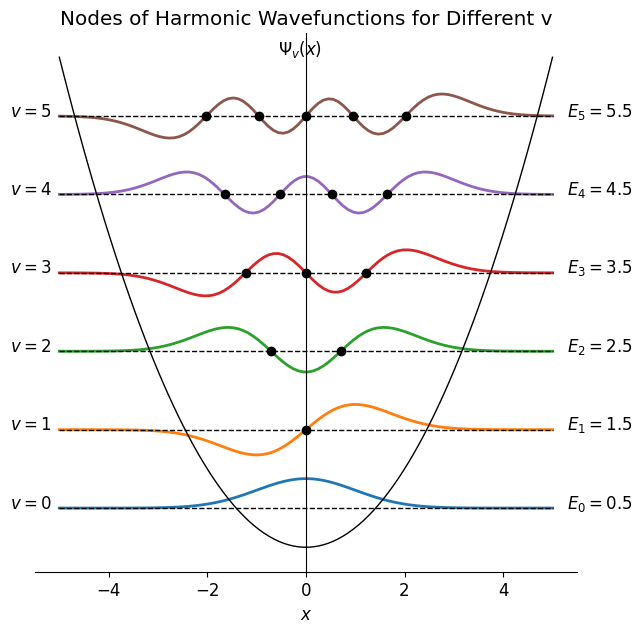

In [9]:
# Plot the wavefunctions

fig, ax = plt.subplots(figsize=(7,7))

for v in range(6):
    # Generate linspace
    f = phi_v(v)
    _x = np.linspace(-5.,5.,100)
    _f = sym.lambdify(x, f)
    E = E_v(v)
    
    # Plotting
    ax.plot(_x, _f(_x)+2*E, linewidth=2,label="v = {0}".format(v)) # +2*E is used to separate the wave functions
    ax.plot(_x, np.zeros(len(_x))+2*E, linewidth=1,color='black', linestyle='--') # plot the baseline
    ax.annotate(f"$E_{v} = {E}$", xy=(5, 2*E), xytext=(5.3, 2*E)) # annotate the energy level
    ax.annotate(f"$v = {v}$", xy=(-5, 2*E), xytext=(-6, 2*E)) # annotate the quantum number

    # solve the equation to get the nodes
    x, y = sym.symbols('x y')
    sol = sym.solve(hermite_poly(v,y), y)
    ax.plot(sol, np.zeros(len(sol))+2*E, 'o', color='black')
 

ax.plot(_x, _V, linewidth=1,color='black') # plot the potential energy curve
# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('center') # set the left spine to the center
ax.set_xlabel("$x$")
ax.set_ylabel("$\Psi_v(x)$", rotation=0).set_position((1,0.95))
ax.set_yticks([])
ax.set_title("Nodes of Harmonic Wavefunctions for Different v")
plt.show()



# End

In [10]:
vID.end(cwd0)

**End at:** Sunday 10 December 2023, 21:06:38  
**Duration:** 00:00:08 795ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>